In [5]:
import pandas as pd
x=pd.read_csv("Emotion_classify_Data.csv")

([<matplotlib.patches.Wedge at 0x164107de630>,
 [Text(0.5393804528751938, 0.9586807221677878, 'anger'),
  Text(-1.09938882389497, -0.03666352267356347, 'joy'),
  Text(0.5710339611679065, -0.9401703118014788, 'fear')],
 [Text(0.2942075197501056, 0.522916757546066, '33.687046%'),
  Text(-0.5996666312154381, -0.01999828509467098, '33.687046%'),
  Text(0.31147306972794897, -0.5128201700735339, '32.625905%')])

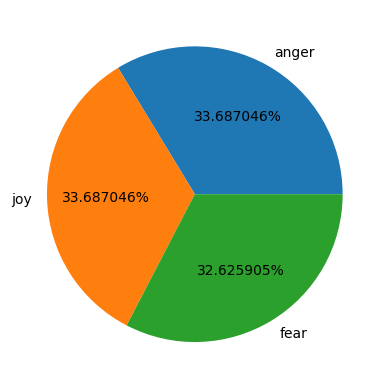

In [8]:
import matplotlib.pyplot as mp
mp.pie(x['Emotion'].value_counts().values,
       labels=x['Emotion'].value_counts().index,
       autopct="%3f%%")

In [1]:
import spacy
from nltk.corpus import stopwords


def words_lemm(text):
    
    # Load spacy English models
    nlp = spacy.load('en_core_web_sm')
    
    # Tokenize and lemmatize using spaCy
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stopwords.words('english')]
    
    # Join the lemmatized tokens into a string
    lemmatized_text = ' '.join(lemmatized_tokens)
    print(lemmatized_text)
    return lemmatized_text

import pandas as pd
x=pd.read_csv("Emotion_classify_data.csv")
x['Comment']=x['Comment'].apply(lambda y: words_lemm(y))
x.to_csv('cleaned.csv')

seriously hate one subject death feel reluctant drop
full life feel appalled
sit write start dig feeling think afraid accept possibility might make
really angry r feel like idiot trust first place
feel suspicious one outside like rapture happen something
feel jealous becasue want kind love true connection two soul want
friend mine keep tell morbid thing happen dog
finally fall asleep feel angry useless still full anxiety
feel bit annoyed antsy good way


KeyboardInterrupt: 

In [1]:
import spacy

In [2]:
import re
import pandas as pd
import spacy
from nltk.corpus import stopwords
from multiprocessing import Pool

In [3]:


# Precompile regular expressions
# pattern1 = re.compile(r'@\w+|http\S+|RT|\d+|[^\w\s]')
# pattern2 = re.compile(r'\s+')

# Load spacy English models
nlp = spacy.load('en_core_web_sm')

# Create stopwords set
stop_words = set(stopwords.words('english'))

def preprocess_text(args):
    index, comment = args
    # Remove unwanted patterns
    # comment = pattern1.sub('', comment)
    # comment = pattern2.sub(' ', comment)
    
    # Tokenize and lemmatize using spaCy
    doc = nlp(comment)
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words]
    
    # Join the lemmatized tokens into a string
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    # Print line with counter number
    print(f"Line {index}: {lemmatized_text}")
    
    return lemmatized_text

def process_csv(filename, chunksize=10000, num_processes=4):
    # Read CSV in chunks
    chunks = pd.read_csv(filename, chunksize=chunksize)
    
    # Process chunks in parallel
    with Pool(num_processes) as pool:
        for chunk in chunks:
            chunk_data = [(index, row['Comment']) for index, row in chunk.iterrows()]
            pool.map(preprocess_text, chunk_data)

# Example usage
processed_texts = process_csv('Emotion_classify_data.csv')


In [2]:
import spacy
import pandas as pd
from spacy.lang.en.stop_words import STOP_WORDS
from multiprocessing import Pool

# Load spacy English model
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Preprocess stop words
stop_words = STOP_WORDS

def process_comment(comment):
    # Tokenize and lemmatize using spaCy
    doc = nlp(comment)
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words]
    return ' '.join(lemmatized_tokens)

def words_lemm_batch(comments):
    with Pool() as pool:
        lemmatized_comments = pool.map(process_comment, comments)
    return lemmatized_comments

# Read the CSV file
x = pd.read_csv("Emotion_classify_data.csv")

# Process comments in batches
batch_size = 1000
total_comments = len(x)
processed_comments = 0

print("Processing comments...")

for i in range(0, total_comments, batch_size):
    batch_comments = x['Comment'][i:i+batch_size]
    lemmatized_comments = words_lemm_batch(batch_comments)
    x.loc[i:i+batch_size-1, 'Comment'] = lemmatized_comments
    
    processed_comments += len(batch_comments)
    print(f"Processed {processed_comments} out of {total_comments} comments.")

# Save the cleaned data to a new CSV file
x.to_csv('cleaned.csv', index=False)

print("All comments processed.")

Processing comments...


In [3]:
import spacy
import pandas as pd
# import nltk
from nltk.corpus import stopwords
from multiprocessing import Pool

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def words_lemm(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words]
    lemmatized_text = ' '.join(lemmatized_tokens)
    print(lemmatized_text)
    return lemmatized_text

def parallelize(data, func):
    with Pool(processes=1) as pool:
        results = pool.map(func, data)
    return results

x = pd.read_csv("Emotion_classify_data.csv")
x['Comment'] = parallelize(x['Comment'].tolist(), words_lemm)
x.to_csv('cleaned.csv', index=False)

In [3]:
import pandas as pd

x = pd.read_csv("Emotion_classify_data.csv")
x.to_parquet("Emotion_classify_data.parquet")

In [3]:
x=pd.read_csv("Emotion_classify_Data.csv")
x

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [5]:
x[0]

KeyError: 0

In [8]:
import spacy
# import nltk
from nltk.corpus import stopwords

nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))
ctr=0
def words_lemm_fast(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc]
    filtered_tokens = [token for token in tokens if token not in stop_words]
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() in filtered_tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    global ctr
    ctr+=1
    print(lemmatized_text+" ",ctr)
    return lemmatized_text

import pandas as pd
x=pd.read_csv("Emotion_classify_data.csv")
x['Comment']=x['Comment'].apply(lambda y: words_lemm_fast(y))
x.to_csv('cleaned.csv')

seriously hate one subject death feel reluctant drop  1
full life feel appalled  2
sit write start dig feeling think afraid accept possibility might make  3
really angry r feel like idiot trust first place  4
feel suspicious one outside like rapture happen something  5
feel jealous becasue want kind love true connection two soul want  6
friend mine keep tell morbid thing happen dog  7
finally fall asleep feel angry useless still full anxiety  8
feel bit annoyed antsy good way  9
feel like regain another vital part life live  10
feel bit like franz liebkind producer many people know fuhrer terrific dancer  11
feel start not want move much really glad experience glimpse sort vibrant energy gain year  12
bite dog  13
always find feel thankful year gather trick allow feel grateful face moment last thing want say thank  14
try talk anyone feel irritable like  15
feel like hate since  16
not know write following little note feel today u r offend follow post obviously live long enough comprom

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
import joblib
# Load your dataset
df = pd.read_csv('cleaned.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Comment'], df['Emotion'], test_size=0.2, random_state=42
)


# Create a pipeline with TF-IDF vectorization and SVC
model = make_pipeline(TfidfVectorizer(), SVC())

# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
predictions = model.predict(test_data)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
classification_report_output = classification_report(test_labels, predictions)
confusion_mat = confusion_matrix(test_labels, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# for heatmap 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.9132996632996633
Classification Report:
              precision    recall  f1-score   support

       anger       0.90      0.91      0.91       392
        fear       0.95      0.88      0.92       416
         joy       0.89      0.95      0.92       380

    accuracy                           0.91      1188
   macro avg       0.91      0.91      0.91      1188
weighted avg       0.91      0.91      0.91      1188

Confusion Matrix:
[[358  10  24]
 [ 28 367  21]
 [ 12   8 360]]


ModuleNotFoundError: No module named 'seaborn'

c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1034s 15s/step - accuracy: 0.3155 - loss: 0.2285 - val_accuracy: 0.3411 - val_loss: -0.2202
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 927s 14s/step - accuracy: 0.3156 - loss: 0.1315 - val_accuracy: 0.3411 - val_loss: -0.4292
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 896s 13s/step - accuracy: 0.3189 - loss: 0.0567 - val_accuracy: 0.3411 - val_loss: -0.2453
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 874s 13s/step - accuracy: 0.3147 - loss: -0.0076 - val_accuracy: 0.3411 - val_loss: -0.2635
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 855s 13s/step - accuracy: 0.3079 - loss: 0.0360 - val_accuracy: 0.3411 - val_loss: -0.2830
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 808s 12s/step - accuracy: 0.3217 - loss: 0.0565 - val_accuracy: 0.3411 - val_loss: -0.2328
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 769s 11s/step - accuracy: 0.3180 - loss: 0.1722 - val_accuracy: 0.3411 - val_loss: -0.2798
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 762s 11s/step - accuracy: 0.3159 - loss: 0.2211 - val_acc

c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Accuracy: 0.3501683501683502
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       392
           1       0.35      1.00      0.52       416
           2       0.00      0.00      0.00       380

    accuracy                           0.35      1188
   macro avg       0.12      0.33      0.17      1188
weighted avg       0.12      0.35      0.18      1188

Confusion Matrix:
[[  0 392   0]
 [  0 416   0]
 [  0 380   0]]


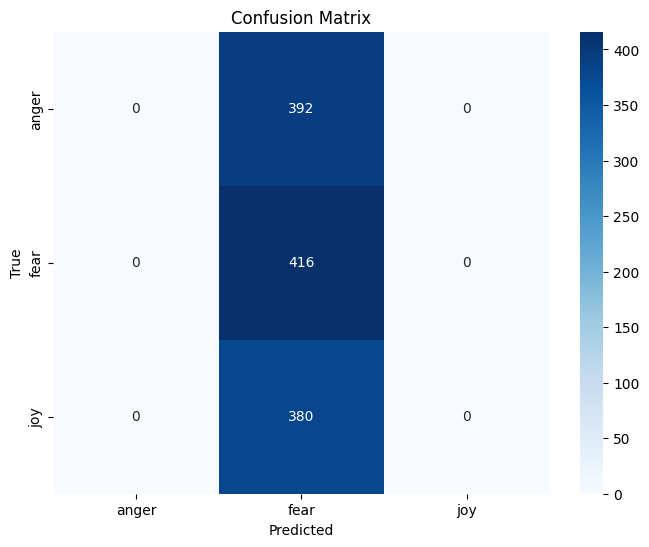

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned.csv')

# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['Comment'], df['Emotion'], test_size=0.2, random_state=42
)

# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Vectorize the text data using CountVectorizer
max_words = 10000
vectorizer = CountVectorizer(max_features=max_words)
train_data_vectorized = vectorizer.fit_transform(train_data)
test_data_vectorized = vectorizer.transform(test_data)

# Pad sequences to ensure uniform length
max_sequence_length = max(train_data_vectorized.shape[1], test_data_vectorized.shape[1])
train_data_padded = pad_sequences(train_data_vectorized.toarray(), maxlen=max_sequence_length)
test_data_padded = pad_sequences(test_data_vectorized.toarray(), maxlen=max_sequence_length)

# Define CNN model
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim,input_shape=(max_sequence_length,) ),
    Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data_padded, train_labels_encoded, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions on the test set
predictions = model.predict(test_data_padded)
predictions = (predictions > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(test_labels_encoded, predictions)
classification_report_output = classification_report(test_labels_encoded, predictions)
confusion_mat = confusion_matrix(test_labels_encoded, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [21]:
import joblib

In [18]:
model.dump("cnn_model.joblib")

AttributeError: 'Sequential' object has no attribute 'dump'

In [26]:
print(model)

<Sequential name=sequential, built=True>


In [29]:
model.predict()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Vishal Goyal\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Vishal Goyal\AppData\Local\Temp\ipykernel_12844\1548584363.py", line 1, in <module>
    model.predict()
  File "c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 123, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Vishal Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 120, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'

During handling of the above exception, another exception occurred:

Traceback (most recent cal

In [34]:
history

In [41]:
model.save('cnn_model.h5')

In [52]:
from tensorflow.keras.models import load_model

In [53]:
mod=load_model("cnn_model.h5")


In [54]:
model_dict={'architecture':mod.to_json(),'weights':mod.get_weights}

In [56]:
joblib.dump(model_dict,'cnn_model1.joblib')

PicklingError: Can't pickle <function Layer._initializer_tracker.<locals>.<lambda> at 0x0000022C8D2DEC00>: it's not found as keras.src.layers.layer.Layer._initializer_tracker.<locals>.<lambda>

In [48]:
from data_cleaning import words_lemm_fast

In [49]:
import tensorflow as tf
x=tf.keras.models.load_model('cnn_model.h5')

In [51]:
w=words_lemm_fast("angry")
v=x.transform([w]).toarray()
pred=x.predict(v)
pred

AttributeError: 'Sequential' object has no attribute 'transform'